Copyright 2022 Google LLC.
SPDX-License-Identifier: Apache-2.0

# Introduction to Clustering

Previously, we've seen ways to develop models for *supervised learning*, or where we have labels, categories, or some other ground-truth values we can use to learn relationships in our data from. But what if we're interested in **unsupervised learning**? That is, if we have some data without matching labels, is there a way to elucidate patterns inherent in the data itself, without known what those relationships are a-priori?

One common unsupervised learning technique is **clustering**, sometimes also known as cluster analysis. The idea behind clustering is to divide your datapoints into groups (clusters), such that data points in each group are more similar to each other than to datapoints in other clusters. Clustering is used in many fields for data exploration.

In this assignment, we'll build some intuition through case studies where you'll apply clustering.

## Learning Goals
* Understand what clustering is and does
* See how clustering can be used to find patterns in the data
* Build intuition into how clustering works
* Get some hands-on experience clustering real-world data

## Part 0: A Brief Primer on K-Means

There are many different algorithms for clustering data. For this assignment, we'll be using the **k-means** algorithm, one of the simplest and most popular clustering algorithms out there.

Most notably, in k-means, you need to specify how many clusters the algorithm should divide your data into, so the number of clusters you select is a tunable hyperparameter. Then, the k-means algorithm attempts to create that many clusters by minimizing the euclidean distance between points in the same cluster.

Don't worry too much about implementation details right now, the goal of this assignment is to build intuition about clustering. We'll look more into the mechanics of how things work in part 2. If you're interested in the details, you can take a look at the [wikipedia entry on k-means](https://en.wikipedia.org/wiki/K-means_clustering) in the meantime.

**Run the following code blocks to install and load all the packages you'll need for this assignment.**

In [1]:
!pip install datacommons --upgrade --quiet
!pip install datacommons_pandas --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 473.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 621.3 kB/s eta 0:00:00


In [2]:
import datacommons
import datacommons_pandas
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for clustering
from sklearn.cluster import KMeans

## Part 1: Images - Building Intuition with FashionMNIST

We'll start exploring clustering with a simple, intuitive case: clustering the [FashionMNIST dataset](https://github.com/zalandoresearch/fashion-mnist).

The FashionMNIST dataset is a collection of over 60,000 (28x28) greyscale images of various clothing items (e.g. shoes, shirts, bags) that's often used as a nice toy dataset in computer vision circles. While this particular dataset already has labels for each image, we'll be working with the images only. That is, we'll see what patterns in FashionMNIST we can recover without any labels.

**Let's start by loading the dataset and viewing some sample images.**


4422102/4422102 [==============================] - 0s 0us/step
Loaded 2000 images. The first 25 are:


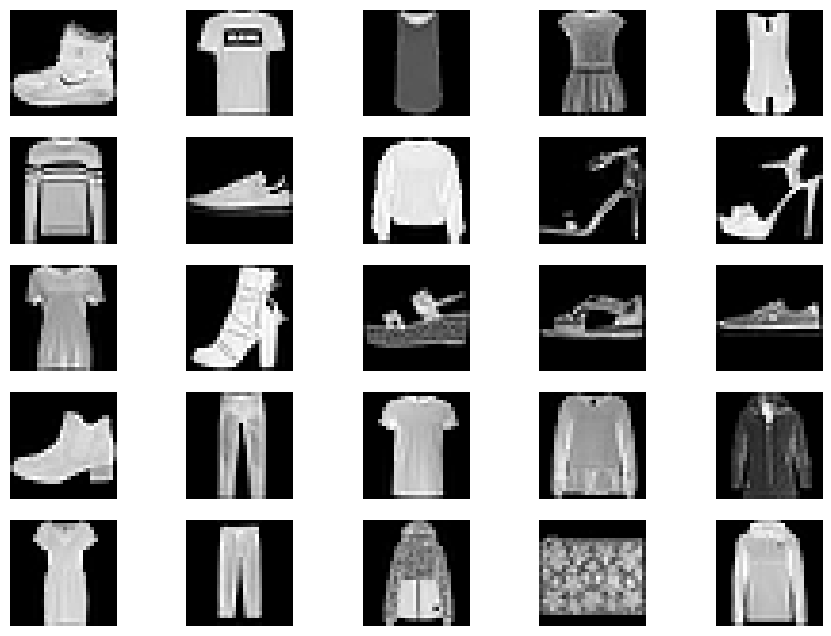

In [3]:
# load dataset
from keras.datasets import fashion_mnist
(fashion_mnist, labels), _ = fashion_mnist.load_data()

# limit to first 2000 images so runtimes are reasonable
fashion_mnist = fashion_mnist[:2000, :, :]

# Show the first 25 images as a sample
print(f"Loaded {fashion_mnist.shape[0]} images. The first 25 are:")
sns.set(rc={'figure.figsize':(11,8)})
for i in range(25):
  # define subplot
  plt.subplot(5, 5, i+1)
  # plot raw pixel data
  plt.imshow(fashion_mnist[i], cmap=plt.get_cmap('gray'))
  plt.axis("off")
plt.show()

To cluster the images, we'll need to convert the images into a format we can pass into our KMeans model, which expects 1D feature vectors. For this assignment, we'll just flatten our image. This is akin to cutting each image up into rows, and concatenating the rows end-to-end to form one long, skinny image.

Note that this is a rather naive way to vecotrize our images, and there are definitely better ways to represent images for clustering. We'll stick with this for now to keep things simple.

In [4]:
# squash images into 1D
fashion_data = fashion_mnist.reshape((-1, 28*28))

**Now run the code box below using different numbers of clusters, and note how the clustering results change.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 contains 1068 images. The first 25 are:


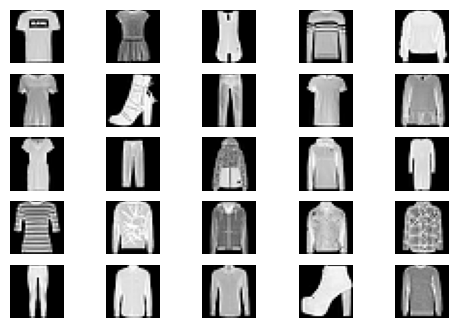

Cluster 1 contains 932 images. The first 25 are:


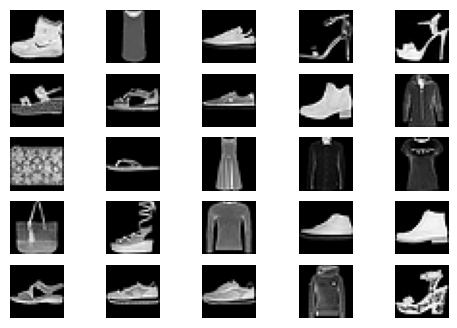

In [5]:
# set number of clusters
k = 2   #Change me!

# cluster the images
kmeans = KMeans(n_clusters=k).fit(fashion_data)

# create a dictionary of clusters to images
clusters = {n:[] for n in range(k)}
for i in range(fashion_data.shape[0]):
  key = kmeans.labels_[i]
  value = fashion_data[i,:].reshape(1, 28, 28).squeeze()
  clusters[key].append(value)

# display images from each cluster
sns.set(rc={'figure.figsize':(6,4)})
for cluster_num, images in clusters.items():
  print(f'Cluster {cluster_num} contains {len(images)} images. The first 25 are:')
  for i in range(min(25, len(images))):
    # define subplot
    plt.subplot(5, 5, i+1)
    # plot raw pixel data
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.axis("off")
  # show the figure
  plt.show()

### 1.1) Effect of number of clusters
**Q1: Try the settings the settings `k=2`, `k=10`, and `k=15`. What value of k results in clusters that are most meaningful?**

A1: We should expect k=10 to work best out of the options given. (FashionMNIST had 10 categories). Students might rightfully point out that the "best" k can depend on what you're looking for (e.g. if k=2 is just shoes vs non-shoes, this might be the right level of nuance for your application!)

**Q2: What happens if k is too small? What happens if k is too large?**

A2: Too small and the clusters will still look heterogenous. Too large and we'll have clusters that seem to represent the same object (e.g. multiple clusters of shirts).






###1.2) What traits get elucidated?
**Q3: Let's go back to `k=2`. What features of the images does KMeans seem to be using to split the data into two groups? Why do you think this was the feaure used?**

A3: k=2 tends to cluster based on image intensity (e.g. dark vs light images). Because k-means uses euclidean distance between pixel values, high on average and low on average pixel values would be the most distinguishing feature at the k=2 level.

**Q4: Now compare `k=10` with `k=8`. Which items or traits group together in `k=8` compared to `k=10`?**

A4: Students should notice that items that look similar (e.g. bag with similar area and shading to shirts) will group first with those items that are most similar.

###1.3) Extension Question

**Q5 (Extension): Imagine you have a set of 1 million unlabeled images that look just like these fashion MNIST images, and you want to generate categorical labels for each of the images. However, labeling each of those 1 million images is too time intensive and costly.**

**Devise a strategy for how you could use clustering to help you label each of the images.**

*A5: Cluster the 1 million images. Label each of the clusters, and assign every image the label corresponding to its cluster*

*This is semi-supervised learning!*

## Part 2: Real-World Data

Now that we've built up some intuition on what k-means does, let's try clustering on some more complex, real world data. We've provided a list of the DCIDs of just over 100 different countries around the world, along with a list of DCIDs statistical variables to start out with.

In case the DCID names are unclear, we'll be looking at the following statistics for each country:
* CO2 emissions per capita
* Life expectancy
* Number of internet users per capita
* Population growth rate
* Percentage of population that is overweight
* [Gini Index](https://www.investopedia.com/terms/g/gini-index.asp) (A measure of economic inequality)
* Percentage of population with mobile phone subscriptions
* [Gross domestic product](https://en.wikipedia.org/wiki/Gross_domestic_product) per captia
* [Fertility rate](https://data.oecd.org/pop/fertility-rates.htm)
* Number of deaths per year, normalized by population

Run the following code boxes to load and cluster the data associated with each country.

In [6]:
dcids = [
  'country/AGO', 'country/ALB', 'country/ARG', 'country/ARM', 'country/AUS',
  'country/AZE', 'country/BDI', 'country/BGD', 'country/BGR', 'country/BIH',
  'country/BLZ', 'country/BOL', 'country/BRA', 'country/BTN', 'country/BWA',
  'country/CAN', 'country/CHL', 'country/CHN', 'country/CMR', 'country/COD',
  'country/COG', 'country/COL', 'country/CRI', 'country/CZE', 'country/DOM',
  'country/DZA', 'country/ECU', 'country/EGY', 'country/ETH', 'country/FJI',
  'country/GAB', 'country/GEO', 'country/GHA', 'country/GTM', 'country/GUY',
  'country/HND', 'country/IDN', 'country/IND', 'country/IRN', 'country/JAM',
  'country/JOR', 'country/JPN', 'country/KAZ', 'country/KEN', 'country/KGZ',
  'country/KIR', 'country/KOR', 'country/LAO', 'country/LBN', 'country/LCA',
  'country/LSO', 'country/MAR', 'country/MDA', 'country/MDG', 'country/MEX',
  'country/MKD', 'country/MLI', 'country/MMR', 'country/MNE', 'country/MNG',
  'country/MOZ', 'country/MRT', 'country/MWI', 'country/MYS', 'country/NAM',
  'country/NER', 'country/NGA', 'country/NIC', 'country/NPL', 'country/PAK',
  'country/PAN', 'country/PER', 'country/PHL', 'country/PNG', 'country/PRY',
  'country/ROU', 'country/RWA', 'country/SDN', 'country/SLV', 'country/SRB',
  'country/SWZ', 'country/SYR', 'country/THA', 'country/TJK', 'country/TKM',
  'country/TLS', 'country/TON', 'country/TTO', 'country/TUN', 'country/TUR',
  'country/TZA', 'country/UGA', 'country/UKR', 'country/USA', 'country/UZB',
  'country/VNM', 'country/VUT', 'country/WSM', 'country/YEM', 'country/ZAF',
  'country/ZMB', 'country/ZWE'
]


stat_vars_to_query = [
  "Amount_Emissions_CarbonDioxide_PerCapita",
  "LifeExpectancy_Person",
  "Count_Person_IsInternetUser_PerCapita",
  "GrowthRate_Count_Person",
  "Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years",
  "GiniIndex_EconomicActivity",
  "Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person",
  "Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita",
  "FertilityRate_Person_Female",
  "Count_Death_AsAFractionOfCount_Person"
]

df = datacommons_pandas.build_multivariate_dataframe(dcids,stat_vars_to_query)

# swap index for names
df.insert(0, 'name', df.index.map(datacommons.get_property_values(df.index, 'name')).str[0])
df.set_index('name', drop=True, inplace=True)

display(df)

,LifeExpectancy_Person,GiniIndex_EconomicActivity,Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,Count_Death_AsAFractionOfCount_Person,Amount_Emissions_CarbonDioxide_PerCapita,GrowthRate_Count_Person,Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,FertilityRate_Person_Female,Count_Person_IsInternetUser_PerCapita
name,,,,,,,,,,
Angola,61.643,51.3,3000.444231,8.009,0.592743,3.096753,0.034,0.673735,5.304,32.602302
Albania,76.463,29.4,6810.114041,11.325,1.544550,-1.215790,0.164,0.978857,1.390,82.613686
Argentina,75.390,42.0,13650.604629,8.955,3.405618,0.925835,0.124,1.323578,1.885,88.375357
Armenia,72.043,27.9,7018.051504,13.007,2.404684,-0.377102,0.137,1.352540,1.575,78.612258
Australia,83.300,34.3,65099.845912,6.700,14.776137,1.238639,0.220,1.070312,1.700,96.240000
...,...,...,...,...,...,...,...,...,...,...
Samoa,72.767,38.7,3745.560367,5.343,0.960782,1.640310,0.087,0.604006,3.930,78.245732
Yemen,63.753,36.7,650.272218,6.845,0.308515,2.144628,0.025,0.460195,3.795,26.718355
South Africa,62.341,63.0,6766.481254,11.432,6.687563,0.841058,0.116,1.673959,2.374,72.310492


### 2.1) The Importance of Normalization
Scroll through the dataframe generated by the codebox above, and take note of the scales of each of the features. They can vary drastically in magnitude! Let's normalize our data before clustering.

**Q1: What do you think would happen if we didn't normalize our data before clustering?**

*A1:Generally the features with higher magnitudes will end up dominating the clustering.*

In [7]:
# normalize the values
mean_df = df.mean()
std_df = df.std()
normalized_df = ((df-mean_df)/std_df)
display(normalized_df)

,LifeExpectancy_Person,GiniIndex_EconomicActivity,Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,Count_Death_AsAFractionOfCount_Person,Amount_Emissions_CarbonDioxide_PerCapita,GrowthRate_Count_Person,Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,FertilityRate_Person_Female,Count_Person_IsInternetUser_PerCapita
name,,,,,,,,,,
Angola,-1.237943,1.528710,-0.412097,-0.189042,-0.692659,1.001806,-0.795136,-1.200586,2.121070,-1.201473
Albania,1.107619,-1.200099,-0.092518,0.789276,-0.397509,-1.077221,1.914579,-0.285581,-1.085972,0.820248
Argentina,0.937795,0.369900,0.481307,0.090056,0.179597,-0.044768,1.080821,0.748175,-0.680380,1.053165
Armenia,0.408065,-1.387004,-0.075075,1.285515,-0.130787,-0.672899,1.351792,0.835025,-0.934387,0.658489
Australia,2.189710,-0.589544,4.797200,-0.575235,3.705531,0.106031,3.081841,-0.011324,-0.831965,1.371094
...,...,...,...,...,...,...,...,...,...,...
Samoa,0.522653,-0.041290,-0.349592,-0.975590,-0.578532,0.299672,0.309594,-1.409691,0.995246,0.643672
Yemen,-0.903993,-0.290496,-0.609245,-0.532456,-0.780797,0.542798,-0.982731,-1.840952,0.884630,-1.439333
South Africa,-1.127470,2.986567,-0.096178,0.820844,1.197310,-0.085638,0.914069,1.798902,-0.279705,0.403739


### 2.2) Interpreting Clusters
Now let's cluster our data! Once again, play around with $k$ to see how the results change.

In [8]:
# Clustering using K-means
n_clusters = 3
kmeans_model = KMeans(n_clusters).fit(normalized_df)
labels_df = pd.DataFrame(data=np.transpose(kmeans_model.labels_), index=normalized_df.index, columns=['cluster'])

# list countries in each cluster:
for i in range(n_clusters):
  print(f'Countries in Cluster {i}:')
  print(labels_df.index[labels_df['cluster']==i].tolist())
  print(len(labels_df.index[labels_df['cluster']==i].tolist()))

Countries in Cluster 0:
['Angola', 'Burundi', 'Cameroon', 'Congo [DRC]', 'Congo [Republic]', 'Ethiopia', 'Ghana', 'Kenya', 'Kiribati', 'Lesotho', 'Madagascar', 'Mali', 'Myanmar', 'Mozambique', 'Mauritania', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Rwanda', 'Sudan', 'Eswatini', 'Tajikistan', 'East Timor', 'Tanzania', 'Uganda', 'Yemen', 'Zambia', 'Zimbabwe']
31
Countries in Cluster 1:
['Albania', 'Armenia', 'Australia', 'Bulgaria', 'Bosnia and Herzegovina', 'Canada', 'China', 'Czech Republic', 'Georgia', 'Japan', 'Kazakhstan', 'South Korea', 'Moldova', 'Macedonia [FYROM]', 'Montenegro', 'Romania', 'Serbia', 'Trinidad and Tobago', 'Ukraine', 'United States']
20
Countries in Cluster 2:
['Argentina', 'Azerbaijan', 'Bangladesh', 'Belize', 'Bolivia', 'Brazil', 'Bhutan', 'Botswana', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Fiji', 'Gabon', 'Guatemala', 'Guyana', 'Honduras', 'Indonesia', 'India', 'Iran', 'Jamaica', 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Analyzing Centroids

What characterizes each of the clusters?

It can be a little hard to tell what characteristics each cluster has latched on to from cluster membership alone. One way to characterize clusters is to look at the **centroids**, which are the average values of each cluster. One can think of the centroids as describing the average group member.

Run the following code box to display the values of the centroids of each cluster. *Note: We're displaying the non-normalized values for better interpretability. The clustering was still performed on normalized values.*

In [9]:
# Get centroids of each cluster.
for i in range(n_clusters):
  print(f'\nCluster {i}:')
  # display non-normalized mean values
  mean_to_display = df[labels_df['cluster']==i].mean()
  display(mean_to_display)


Cluster 0:


LifeExpectancy_Person                                                        62.534161
GiniIndex_EconomicActivity                                                   41.051613
Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita          1607.089393
Count_Death_AsAFractionOfCount_Person                                         8.066000
Amount_Emissions_CarbonDioxide_PerCapita                                      0.486050
GrowthRate_Count_Person                                                       2.281569
Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years       0.037613
Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person            0.831259
FertilityRate_Person_Female                                                   4.126935
Count_Person_IsInternetUser_PerCapita                                        32.817589
dtype: float64


Cluster 1:


LifeExpectancy_Person                                                         75.427243
GiniIndex_EconomicActivity                                                    32.885000
Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita          21398.108282
Count_Death_AsAFractionOfCount_Person                                         13.079550
Amount_Emissions_CarbonDioxide_PerCapita                                       7.026586
GrowthRate_Count_Person                                                       -1.049861
Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years        0.106300
Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person             1.284317
FertilityRate_Person_Female                                                    1.620700
Count_Person_IsInternetUser_PerCapita                                         83.552764
dtype: float64


Cluster 2:


LifeExpectancy_Person                                                        71.339157
GiniIndex_EconomicActivity                                                   40.213725
Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita          6457.742674
Count_Death_AsAFractionOfCount_Person                                         7.267412
Amount_Emissions_CarbonDioxide_PerCapita                                      2.601929
GrowthRate_Count_Person                                                       1.062270
Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years       0.079745
Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person            1.139248
FertilityRate_Person_Female                                                   2.286627
Count_Person_IsInternetUser_PerCapita                                        71.932636
dtype: float64

#### Visualizing Centroids
These values can be difficult to compare on their own. One good way to visualize cluster centroids is by using a color-coded heatmap of normalized values. Use the code box below to generate such a heat map.

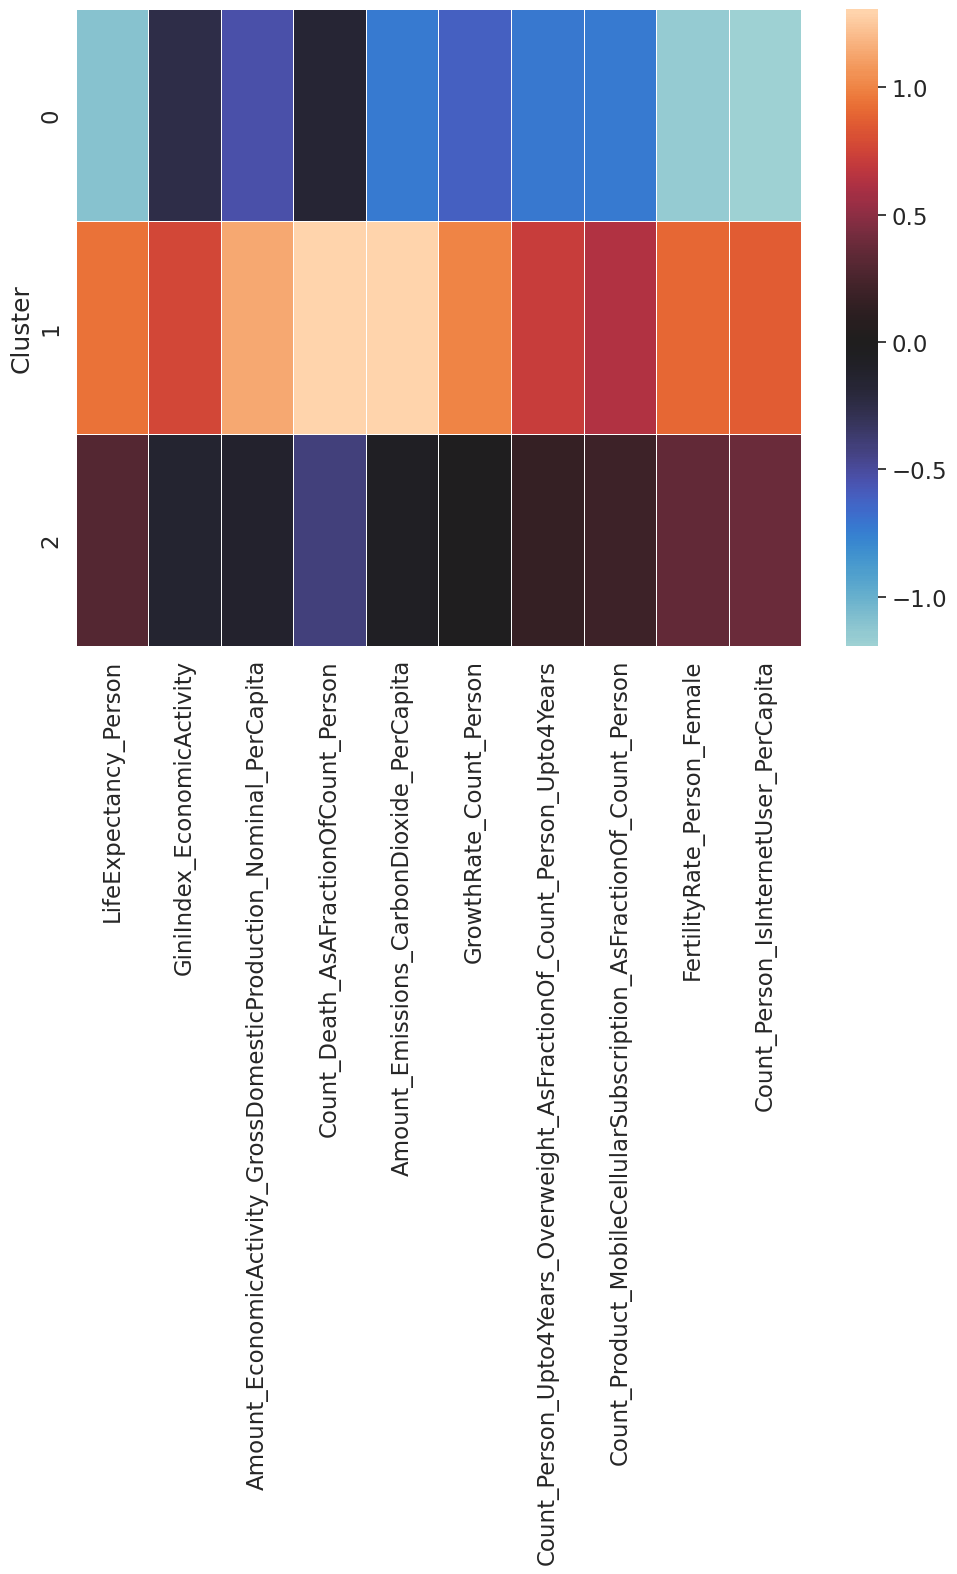

In [10]:
# get normalized values
normalized_means = []
for i in range(n_clusters):
  # calculate normalized values for the next part
  mean_normalized = normalized_df[labels_df['cluster']==i].mean()
  normalized_means.append(mean_normalized.to_frame().transpose())
normalized_means_df = pd.concat(normalized_means)

# For better visualization, we'll multiply the following features by -1
# so that a higher value is associated with more development.

features_to_flip = [
  "GiniIndex_EconomicActivity",
  "GrowthRate_Count_Person",
  "FertilityRate_Person_Female"
]

for column in features_to_flip:
  normalized_means_df[column] *= -1

# Plot heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
ax = sns.heatmap(normalized_means_df.to_numpy(), linewidth=0.5, xticklabels=normalized_means_df.columns, center=0)
ax.set_ylabel("Cluster")
plt.show()

*For Q2-Q4, please answer using `k=3`.*

**Q2: What does each cluster seem to represent?**

Now, here's a list of 3 held-out countries (i.e., countries that weren't part of the original countries we used to create the clusters).

- Germany
- Haiti
- Iraq

**Q3: For each of the countries listed above, make a prediction for which cluster the country would be a member of.**

Run the code box below to get feature values for each country that can help you answer Q3.

In [11]:
dcids_holdout = ['country/HTI','country/DEU', 'country/IRQ']

# get values for each holdout
df_holdout = datacommons_pandas.build_multivariate_dataframe(dcids_holdout,stat_vars_to_query)

# ensure columns are in exactly the same order as those used previously for clustering
df_holdout = df_holdout[normalized_df.columns]

# drop rows with missing values
df_holdout = df_holdout.dropna()

# swap index for names
df_holdout.insert(0, 'name', df_holdout.index.map(datacommons.get_property_values(df_holdout.index, 'name')).str[0])
df_holdout.set_index('name', drop=True, inplace=True)

# show values
display(df_holdout)

# normalized version for clustering later
normalized_df_holdout = ((df_holdout-mean_df)/std_df)

,LifeExpectancy_Person,GiniIndex_EconomicActivity,Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,Count_Death_AsAFractionOfCount_Person,Amount_Emissions_CarbonDioxide_PerCapita,GrowthRate_Count_Person,Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,FertilityRate_Person_Female,Count_Person_IsInternetUser_PerCapita
name,,,,,,,,,,
Germany,80.900976,31.7,48717.991140,12.300,7.255221,0.720875,0.029,1.252251,1.580,91.629844
Haiti,63.192000,41.1,1748.257132,8.676,0.283815,1.193342,0.034,0.639350,2.814,38.945018
Iraq,70.378000,29.5,5937.195466,4.753,3.842178,2.186917,0.061,0.981842,3.496,78.715611


Now, let's see where these countries would actually have clustered.

In [12]:
# find which cluster centroid is closest
for country in df_holdout.index:
  country_data = normalized_df_holdout.loc[country].to_numpy()
  country_data = country_data[np.newaxis, :]
  difference = normalized_means_df.to_numpy() - country_data
  distance = np.linalg.norm(difference,axis=1)
  cluster_membership = np.argmin(distance, axis=0)
  print(f"{country} belongs to cluster {cluster_membership}")

Germany belongs to cluster 1
Haiti belongs to cluster 0
Iraq belongs to cluster 2


**Q4: Did these countries cluster in the way that you expected? If not, why not?**

**Q5: Now run this section again for a larger value of K. Are you able to find a setting with more nuance? What traits do the clusters highlight?**